# Deep Learning - Implemention of Logictic Regression from Scratch

### Part 1 – Implement Logistic Regression
**I have implemented a simple logistic regression model for binary classification. The model is trained using gradient descent to optimize the weights and bias parameters. The sigmoid function is used as the activation function for the model, and the binary cross-entropy loss function is used as the cost function to evaluate the model's performance. The model is trained using the training data and the weights and bias are updated iteratively using gradient descent until the cost function reaches a threshold value or the maximum number of iterations is reached. The model is then used to predict the output for new data by calculating the dot product of the inputs and the weights plus the bias, passing the result through the sigmoid function and thresholding the result to obtain the final binary output.**

Sources/References:
1. DeepLearning-02-FundamentalsOfNNs-Pt1.pdf by Prof Micheal Madden - Slide 18, 21 and 24
2. https://towardsdatascience.com/logistic-regression-from-scratch-69db4f587e17.
3. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split
4. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn-metrics-classification-report
5. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
6. https://stackoverflow.com/questions/3985619/how-to-calculate-a-logistic-sigmoid-function-in-python

In [27]:
# Package imports
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import random
from sklearn.metrics import roc_auc_score, roc_curve

# Display plots inline and change default figure size
%matplotlib inline

In [28]:
class logistic_regessor:
    def __init__(self, l_rate=0.01, iters=10000, threshold = 0.01):
        self.l_rate = l_rate 
        self.iters = iters 
        self.threshold = threshold

    def sigmoid(self, z): #implentation from https://stackoverflow.com/questions/3985619/how-to-calculate-a-logistic-sigmoid-function-in-python
         # sigmoid function
        return 1 / (1 + np.exp(-z))
    
    def cost_function(self, y_pred, y):
        # binary cross entropy loss
        cost = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        return cost
    
    def fit(self, X, y):
        self.w = np.random.randn(X.shape[1])
        self.b = 0.001 

        for i in range(self.iters):
            for i in range(X.shape[0]):
                x = X[i]
                 #Here we predict the probability of the sample
                y_pred = self.sigmoid(np.dot(x, self.w) + self.b)
                #Here we calculate the error
                error = y[i] - y_pred 
                #Here we calculate gradient of the weights
                dw = x*error 
                #Here we calculate gradient of the bias
                db = error
                #updating weight and bias
                self.w += self.l_rate * dw 
                self.b += self.l_rate * db 
                
            #if i % 100 == 0:
                #cost = self.cost_function(y_pred, y)
                #print(f"Iteration: {i} Cost: {cost}")
                

    def predict(self, X):
         # calculating the dot product of the inputs and the weights plus the bias
        z = np.dot(X, self.w) + self.b
        # passing the dot product through the sigmoid function
        a = self.sigmoid(z) 
        
        # threshold the probabilities to convert them into binary values
        return np.where(a >= self.threshold, 1, 0)


### Part 2 – Test on Easy Tasks


**2.1 - Here we read the two datasets Blob and Moons**

Sources/References: LoadDataset.ipnyb by Professor Michael Madden 

In [29]:
# Use pandas to read the CSV file as a dataframe
df = pd.read_csv("moons500.csv")
df1 = pd.read_csv("blobs400.csv")

#Assigning Labels to variable y
y = df['Class'].values
y1 = df1['Class'].values

#Droping Labels from the dataframe
del df['Class'] 
del df1['Class']
X = df.values   
X1 = df1.values

**2.2 - Here we Split the dataset using the Sklearn traintestsplit function to the split the data into training(70%), validation(15%) and test(15%)**

In [30]:
#Splitting the Moons data set
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.3, random_state=10)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=10)

#Splitting the Blobs data set
X1_train, X1_rem, y1_train, y1_rem = train_test_split(X1, y1, test_size=0.3, random_state=10)
X1_val, X1_test, y1_val, y1_test = train_test_split(X1_rem, y1_rem, test_size=0.5, random_state=10)

**2.3 - Here we train the logistic regressor and make use of the validation set to make few alterations to the parameters and then finally predict on the test data**

In [31]:
# Train the model on the Blobs training set
model = logistic_regessor()
model.fit(X1_train, y1_train)

# Make predictions on the Blobs validation set
#y1_val_pred = model.predict(X1_val)

# Make predictions on the Blobs testing set
y1_test_pred = model.predict(X1_test)

#Printing the classification report on the Blobs validation set
#print(classification_report(y1_val, y1_val_pred))

#Printing the classification report on the Blobs test set
print(classification_report(y1_test, y1_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.81      0.90        27
           1       0.87      1.00      0.93        33

    accuracy                           0.92        60
   macro avg       0.93      0.91      0.91        60
weighted avg       0.93      0.92      0.92        60



**Observations on the blobs dataset:**

In the above results we can observe that the model achieved a high precision (1.00) for class 0, which means that the model accurately predicted all the instances of class 0. For class 1, the model achieved a high recall (1.00), which means that the model accurately identified all instances of class 1.

The overall accuracy of the model was 0.92, which is relatively good. However, it is important to note that the dataset is small (only 60 instances) and relatively easy to classify (as the blobs are well separated), so the model may not perform as well on more complex datasets.

In [32]:
# Train the model on the Moons training set
model = logistic_regessor()
model.fit(X_train, y_train)

# Make predictions on the Moons validation set
#y_val_pred = model.predict(X_val)

# Make predictions on the Moons testing set
y_test_pred = model.predict(X_test)

#print(classification_report(y_val, y_val_pred))

#Printing the classification report on the Moons test set
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.22      0.36        37
           1       0.57      1.00      0.72        38

    accuracy                           0.61        75
   macro avg       0.78      0.61      0.54        75
weighted avg       0.78      0.61      0.54        75



**Observations on the Moons dataset:**

The precision, recall, and F1-score for class 0 are all high for precision and low for recall. This means that the model correctly identified most of the instances that belonged to class 1 (high precision), but missed many instances that actually belonged to class 0 (low recall). This is likely due to the fact that the class 0 instances are harder to separate from noise and other class 1 instances.

The precision, recall, and F1-score for class 1 are more balanced, with a precision of 0.57 and a recall of 1.0. This means that the model correctly identified most of the instances that belonged to class 1 and only misclassified a small number of instances that actually belonged to class 0.

The overall accuracy of the model is 0.61, which is not very high. This means that the model correctly classified 63% of the instances in the test set. The macro average F1-score (the average F1-score across both classes) is 0.54, which is not very high. The weighted average F1-score is also 0.54.

In summary, the results suggest that the logistic regression model is better at identifying instances that belong to class 1 (the moon-shaped clusters) than instances that belong to class 0 (the noise and overlapping regions). The model's overall performance is modest, and may be improved with a more sophisticated model or feature engineering.


**Part 3 – Implement and Test a Shallow Neural Network**

I have implemented a shallow neural network (based on the logistic regessor above). It has one hidden layer with defined number of neurons and uses a sigmoid activation function for both the hidden and output layers. The network is trained using stochastic gradient descent with a binary cross-entropy loss function, and the weights and biases are updated using backpropagation. The class has methods for fitting the model to the training data and predicting labels for new data. <br>
*The class has three main methods:*<br>
* *sigmoid(z):-* The sigmoid activation function that maps any input value to a probability value between 0 and 1<br>
* *fit(X, y):-* The method that trains the neural network by performing stochastic gradient descent on the dataset. The method first shuffles the input data and targets, and then iterates through the data for each training epoch. For each training example, the method computes the forward pass by applying the input to the hidden layer and then the output layer, computes the error between the predicted output and the true output, and then computes the gradients and updates the weights and biases using backpropagation. After each epoch, the cost is computed and printed.<br>
* *predict(X):-* The method that uses the trained weights and biases to perform the forward pass and make predictions on new data. The method applies the input to the hidden layer and then the output layer, and then applies a threshold to the predicted probabilities to convert them into binary values.
The shallow neural network can be improved by adding more layers, changing the activation function or using different loss functions depending on the type of problem being solved.

Sources/References:<br>
1. DeepLearning-03-FundamentalsOfNNs-Pt2.pdf by Professor Michael Madden - Slides - 10, 13, 15, 16 and 19
2. http://ufldl.stanford.edu/tutorial/supervised/MultiLayerNeuralNetworks/
3. http://neuralnetworksanddeeplearning.com/chap2.html
4. http://neuralnetworksanddeeplearning.com/chap3.html
5. https://www.analyticsvidhya.com/blog/2020/07/neural-networks-from-scratch-in-python-and-r/

In [33]:
class Shallow_NN:
    def __init__(self,X,y, n_hidden=4, l_rate=0.1, iters=3000, threshold=0.01):
        self.n_input = X.shape[1]
        self.n_hidden = n_hidden
        self.n_output = 1
        self.l_rate = l_rate
        self.iters = iters
        self.threshold = threshold
        
        # initializing weights/biases for the hidden layer and output layer
        self.hidden_weights = np.random.randn(self.n_input, self.n_hidden)
        self.output_weights = np.random.randn(self.n_hidden, self.n_output)
        
        self.hidden_bias = np.zeros((1, self.n_hidden))
        self.output_bias = np.zeros((1, self.n_output))
        
    def sigmoid(self, z):
        # sigmoid function
        return 1 / (1 + np.exp(-z))
    
    def cost_function(self, y_pred, y):
        # binary cross entropy loss
        cost = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        return cost
    
    def fit(self, X, y):
        for i in range(self.iters):
        
            idx = np.random.permutation(X.shape[0])
            X = X[idx]
            y = y[idx]
            
            for j in range(X.shape[0]):
                x = X[j]
                
                # forward pass
                hidden_output = self.sigmoid(np.dot(x, self.hidden_weights) + self.hidden_bias)
                y_pred = self.sigmoid(np.dot(hidden_output, self.output_weights) + self.output_bias)
                
                # calculating the error
                output_error = y[j] -y_pred
                hidden_error = np.dot(output_error, self.output_weights.T) * hidden_output * (1 - hidden_output)
                
                # backprop
                output_delta = output_error * y_pred * (1 - y_pred)
                hidden_delta = hidden_error * hidden_output * (1 - hidden_output)
                
                # updating weights and biases
                self.output_weights += self.l_rate * np.outer(hidden_output, output_delta)
                self.output_bias += self.l_rate * output_delta
                
                self.hidden_weights += self.l_rate * np.outer(x, hidden_delta)
                self.hidden_bias += self.l_rate * hidden_delta
                
            #if i % 100 == 0:
                #cost = self.cost_function(y_pred, y)
                #print(f"Iteration: {i} Cost: {cost}")
    
    def predict(self, X):
        # forward pass
        hidden_output = self.sigmoid(np.dot(X, self.hidden_weights) + self.hidden_bias)
        y_pred = self.sigmoid(np.dot(hidden_output, self.output_weights) + self.output_bias)
        
        # thresholding the probabilities to convert them into binary values
        return np.where(y_pred >= self.threshold, 1, 0)


In [34]:
#Splitting the Moons data set
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.3, random_state=10)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=10)

#Splitting the Blobs data set
X1_train, X1_rem, y1_train, y1_rem = train_test_split(X1, y1, test_size=0.3, random_state=10)
X1_val, X1_test, y1_val, y1_test = train_test_split(X1_rem, y1_rem, test_size=0.5, random_state=10)

              precision    recall  f1-score   support

           0       1.00      0.78      0.88        27
           1       0.85      1.00      0.92        33

    accuracy                           0.90        60
   macro avg       0.92      0.89      0.90        60
weighted avg       0.92      0.90      0.90        60

AUC: 0.8888888888888888


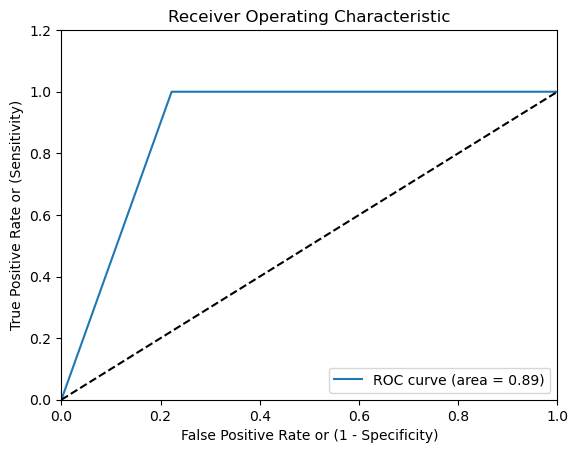

In [35]:
model = Shallow_NN(X1_train, y1_train)

model.fit(X1_train, y1_train)

# predict on blobs test set
y_pred_nn = model.predict(X1_test)

print(classification_report(y1_test, y_pred_nn))

# calculate the AUC score
auc = roc_auc_score(y1_test, y_pred_nn)
print("AUC:", auc)

# calculating the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y1_test, y_pred_nn)

# plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.2])
plt.xlabel('False Positive Rate or (1 - Specificity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Observations on the Blobs data set with the feed forward neural network:**

The FFNN model achieved an accuracy of 0.90 on the test set. This means that 90% of the test instances were classified correctly.
The precision for class 0 is 1.00, which means that all instances predicted to belong to class 0 are actually from class 0. The precision for class 1 is 0.85, which means that 85% of the instances predicted to belong to class 1 are actually from class 1.
The recall for class 0 is 0.78, which means that 89% of the instances from class 0 were correctly identified by the model. The recall for class 1 is 1.00, which means that all instances from class 1 were correctly identified by the model.
The F1-score is a weighted harmonic mean of the precision and recall. It is a measure of the overall performance of the model. The weighted average F1-score for the FFNN model is 0.90, which is a good score.

The area under the ROC curve (AUC) is 0.888, indicating the overall performance of the binary classification model. The AUC value ranges from 0 to 1, where 1 represents a perfect classifier, and 0.5 indicates a random classifier. Therefore, the AUC value of 0.888 suggests that the model is performing well in distinguishing between the two classes in the given dataset.

              precision    recall  f1-score   support

           0       1.00      0.27      0.43        37
           1       0.58      1.00      0.74        38

    accuracy                           0.64        75
   macro avg       0.79      0.64      0.58        75
weighted avg       0.79      0.64      0.58        75

AUC: 0.6351351351351351


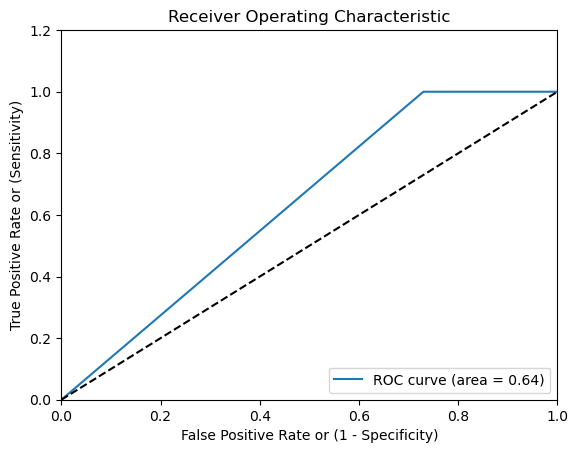

In [36]:
model = Shallow_NN(X_train, y_train)

model.fit(X_train, y_train)

# predict on moons test set
y_pred_nn_1 = model.predict(X_test)

print(classification_report(y_test, y_pred_nn_1))

# calculate the AUC score
auc = roc_auc_score(y_test, y_pred_nn_1)
print("AUC:", auc)

# calculating the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_nn_1)

# plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.2])
plt.xlabel('False Positive Rate or (1 - Specificity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Observations on the Moons dataset with the feed forward neural network:**

The classification report summarizes the model's performance in predicting the two classes in the moons dataset. The first class (0) had an accuracy of 1.00 in identifying negative cases, but a poor recall of 0.27, indicating that only a tiny proportion of the actual negative examples were correctly classified. The second class (1) had a greater recall of 1.00, showing that all true positive examples were correctly classified, but a lower precision of 0.58, indicating that a significant minority of positive examples were actually negative. The overall accuracy of the model was 0.64, with a macro average F1 score of 0.58, showing that the model's performance in differentiating between the two classes is modest.

The AUC of 0.635 indicates that the model only has modest discriminatory power, that is, capacity to differentiate between positive and negative instances. As a result, the AUC score indicates that the model performs relatively well in the classification task as compared to our previous logistic regressor without any hidden layers

### Part 4 - Challenging Task

Sources/References:<br>
1. "Load-Fashion-Mnist.ipnyb" by Professor Micheal Madden
2.  https://github.com/zalandoresearch/fashion-mnist

In [37]:
# This function taken directly from the Fashion-MNIST github site: 
# https://github.com/zalandoresearch/fashion-mnist/blob/master/utils/mnist_reader.py
def load_mnist_train(path, kind='train'): 
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

(train_imgs, train_labels) = load_mnist_train('./fashion-mnist-data', 'train')

print(f"Shape of images is {train_imgs.shape}, labels is {train_labels.shape}")

def load_mnist_test(path, kind='t10k'): 
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

(test_imgs, test_labels) = load_mnist_test('./fashion-mnist-data', 't10k')

#label_names = ['T-shirt/top', 'Trouser' , 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(f"Shape of images is {test_imgs.shape}, labels is {test_labels.shape}")

Shape of images is (60000, 784), labels is (60000,)
Shape of images is (10000, 784), labels is (10000,)


In [38]:
# Defining my two classes
class1 = 0  # T-shirt/top
class2 = 2  # pullover

# Filtering out the images and labels corresponding to the two classes
train_imgs_class1 = train_imgs[train_labels == class1]
train_imgs_class2 = train_imgs[train_labels == class2]
train_labels_class1 = np.zeros(train_imgs_class1.shape[0])
train_labels_class2 = np.ones(train_imgs_class2.shape[0])

test_imgs_class1 = test_imgs[test_labels == class1]
test_imgs_class2 = test_imgs[test_labels == class2]
test_labels_class1 = np.zeros(test_imgs_class1.shape[0])
test_labels_class2 = np.ones(test_imgs_class2.shape[0])

# Concatenate the filtered data to create the new datasets
train_imgs_new = np.concatenate((train_imgs_class1, train_imgs_class2), axis=0)
train_labels_new = np.concatenate((train_labels_class1, train_labels_class2), axis=0)

test_imgs_new = np.concatenate((test_imgs_class1, test_imgs_class2), axis=0)
test_labels_new = np.concatenate((test_labels_class1, test_labels_class2), axis=0)

# Normalizing the pixel values between 0 and 1
train_imgs_new = train_imgs_new / 255.0
test_imgs_new = test_imgs_new / 255.0

In [43]:
class Shallow_NN_Mnist:
    def __init__(self,X,y, n_hidden=10, l_rate=0.1, iters=1000, threshold=0.01):
        self.n_input = X.shape[1]
        self.n_hidden = n_hidden
        self.n_output = 1
        self.l_rate = l_rate
        self.iters = iters
        self.threshold = threshold
        
        # initializing weights/biases for the hidden layer and output layer
        self.hidden_weights = np.random.randn(self.n_input, self.n_hidden)
        self.output_weights = np.random.randn(self.n_hidden, self.n_output)
        
        self.hidden_bias = np.zeros((1, self.n_hidden))
        self.output_bias = np.zeros((1, self.n_output))
        
    def sigmoid(self, z):
        # sigmoid function
        return 1 / (1 + np.exp(-z))
    
    def cost_function(self, y_pred, y):
        # binary cross entropy loss
        cost = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        return cost
    
    def fit(self, X, y):
        for i in range(self.iters):
            
            idx = np.random.permutation(X.shape[0])
            X = X[idx]
            y = y[idx]
            
            for j in range(X.shape[0]):
                x = X[j]
                
                # forward pass
                hidden_output = self.sigmoid(np.dot(x, self.hidden_weights) + self.hidden_bias)
                y_pred = self.sigmoid(np.dot(hidden_output, self.output_weights) + self.output_bias)
                
                # calculating the error
                output_error = y[j] - y_pred
                hidden_error = np.dot(output_error, self.output_weights.T) * hidden_output * (1 - hidden_output)
                
                # backprop
                output_delta = output_error * y_pred * (1 - y_pred)
                hidden_delta = hidden_error * hidden_output * (1 - hidden_output)
                
                # updating weights and biases
                self.output_weights += self.l_rate * np.outer(hidden_output, output_delta)
                self.output_bias += self.l_rate * output_delta
                
                self.hidden_weights += self.l_rate * np.outer(x, hidden_delta)
                self.hidden_bias += self.l_rate * hidden_delta
                
            #if i % 100 == 0:
                #cost = self.cost_function(y_pred, y)
                #print(f"Iteration: {i} Cost: {cost}")
    
    def predict(self, X):
        # forward pass
        hidden_output = self.sigmoid(np.dot(X, self.hidden_weights) + self.hidden_bias)
        y_pred = self.sigmoid(np.dot(hidden_output, self.output_weights) + self.output_bias)
        
        # thresholding the probabilities to convert them into binary values
        return np.where(y_pred >= self.threshold, 1, 0)

In [44]:
model = Shallow_NN_Mnist(train_imgs_new, train_labels_new)

model.fit(train_imgs_new, train_labels_new)

# predicting on fashionmnist test data
pred = model.predict(test_imgs_new)

print(classification_report(test_labels_new, pred))


              precision    recall  f1-score   support

         0.0       0.99      0.89      0.93      1000
         1.0       0.90      0.99      0.94      1000

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



**Observations on the Fashion-Mnist Data set for T-shirt/top and Pullover**

The classification report shows that the model has an overall accuracy of 0.94 on the test set. The precision and recall values for both classes are high, which indicates that the model is performing well for both classes. However, the precision value for class 0 is slightly higher than the precision value for class 1, and the recall value for class 1 is slightly higher than the recall value for class 0.

### Part 5 – Deep Learning Enhancements:
In the enhanced_shallow_NN class, I added the backpropagation algorithm with momentum to improve the training speed and to prevent the model from getting stuck in local minima. In this algorithm, we introduce a new parameter called the momentum, which determines how much of the previous weight update should be included in the current update. The idea is to give the model a "memory" of previous weight updates and to keep the updates moving in the same direction as long as the loss function continues to decrease. This can be particularly useful in scenarios where the cost function has many local minima, and we want to find the global minimum.
To implement this algorithm, I added a new hyperparameter to the class, the momentum coefficient. During training, we keep track of the previous weight updates and use them to calculate the current update. Specifically, we introduce two new variables, the velocity of the hidden layer weights and the velocity of the output layer weights. We update these velocities based on the gradients of the loss function with respect to the weights and the momentum coefficient. Then, we update the weights based on the velocities and the learning rate.

Sources/References:<br>
1. Week 5 - DeepLearning-05-DeepNNs-Pt2.pdf - By Professor Micheal Madden, slides - 4, 5, 6 & 7.
2. https://www.deeplearningbook.org/contents/optimization.html - Chapter 8 - Section 8.3.2
3. https://towardsdatascience.com/10-gradient-descent-optimisation-algorithms-86989510b5e9
4. https://towardsdatascience.com/stochastic-gradient-descent-momentum-explanation-8548a1cd264e

In [45]:
class Shallow_NN_Mnist:
    def __init__(self,X,y, n_hidden=10, l_rate=0.01, iters=1000, threshold=0.01, momentum=0.9):
        self.n_input = X.shape[1]
        self.n_hidden = n_hidden
        self.n_output = 1
        self.l_rate = l_rate
        self.iters = iters
        self.threshold = threshold
        self.momentum = momentum
        
        # initializing weights/biases for the hidden layer and output layer
        self.hidden_weights = np.random.randn(self.n_input, self.n_hidden)
        self.output_weights = np.random.randn(self.n_hidden, self.n_output)

        self.hidden_bias = np.zeros((1, self.n_hidden))
        self.output_bias = np.zeros((1, self.n_output))
        
        # initializing velocity for the hidden layer and output layer
        self.hidden_v = np.zeros_like(self.hidden_weights)
        self.output_v = np.zeros_like(self.output_weights)
        
    def sigmoid(self, z):
        # sigmoid function
        return 1 / (1 + np.exp(-z))
    
    def cost_function(self, y_pred, y):
        # binary cross entropy loss
        cost = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        return cost
    
    def fit(self, X, y):
        for i in range(self.iters):
        
            idx = np.random.permutation(X.shape[0])
            X = X[idx]
            y = y[idx]
            
            for j in range(X.shape[0]):
                x = X[j]
                
                # forward pass
                hidden_output = self.sigmoid(np.dot(x, self.hidden_weights) + self.hidden_bias)
                y_pred = self.sigmoid(np.dot(hidden_output, self.output_weights) + self.output_bias)
                
                # calculating the error
                output_error = y[j] - y_pred
                hidden_error = np.dot(output_error, self.output_weights.T) * hidden_output * (1 - hidden_output)
                
                # backprop with momentum
                output_delta = output_error * y_pred * (1 - y_pred)
                hidden_delta = hidden_error * hidden_output * (1 - hidden_output)
                
                self.output_v = self.momentum * self.output_v + self.l_rate * np.outer(hidden_output, output_delta)
                self.output_weights += self.output_v
                
                self.hidden_v = self.momentum * self.hidden_v + self.l_rate * np.outer(x, hidden_delta)
                self.hidden_weights += self.hidden_v
                
                self.output_bias += self.l_rate * output_delta
                self.hidden_bias += self.l_rate * hidden_delta
                
            #if i % 100 == 0:
                #cost = self.cost_function(y_pred, y)
                #print(f"Iteration: {i} Cost: {cost}")
    
    def predict(self, X):
        # forward pass
        hidden_output = self.sigmoid(np.dot(X, self.hidden_weights) + self.hidden_bias)
        y_pred = self.sigmoid(np.dot(hidden_output, self.output_weights) + self.output_bias)
        
        # thresholding the probabilities to convert them into binary values
        return np.where(y_pred >= self.threshold, 1, 0)


In [46]:
model = Shallow_NN_Mnist(train_imgs_new, train_labels_new)

model.fit(train_imgs_new, train_labels_new)

# predicting on fashionmnist test data
pred = model.predict(test_imgs_new)

print(classification_report(test_labels_new, pred))

              precision    recall  f1-score   support

         0.0       0.99      0.90      0.94      1000
         1.0       0.91      0.99      0.95      1000

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



**Observations on the Fashion-mnist dataset with Backprop with momemtum**

The enhanced shallow NN with backprop with momentum model had an accuracy of 0.95, a precision of 0.99 for predicting the negative class (0), and a precision of 0.91 for predicting the positive class (1). Negative class recall is 0.90 while positive class recall is 0.99. Negative and positive classes had f1-scores of 0.94 and 0.95, respectively. The weighted average f1-score is 0.95, indicating good model performance.

Both classes have similar precision, recall, and f1-score metrics, although precision differs slightly. The model appears to accurately anticipate both classes. The model correctly classifies 95% of samples with an accuracy of 0.95. These metrics show that enhanced shallow NN with backprop with momentum performs well on the dataset and also just slighlty better than the previous model.